In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv


In [71]:
pip install simdkalman

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import simdkalman
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
df = pd.read_csv('/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv',encoding='ISO-8859-1',delimiter=';')

In [74]:
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [75]:
data=df.drop(columns='Ngày',axis=1)
data.head() 

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [76]:
feats=['13','14','15']

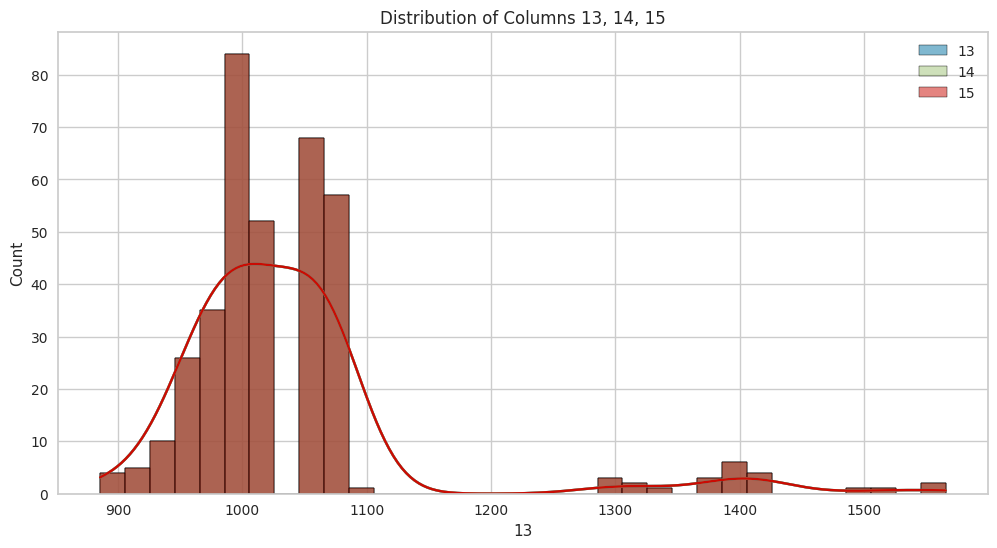

In [77]:
# biểu đồ phân phối
plt.figure(figsize=(12, 6))
sns.histplot(df['13'], kde=True, label='13')
sns.histplot(df['14'], kde=True, label='14')
sns.histplot(df['15'], kde=True, label='15')
plt.legend()
plt.title('Distribution of Columns 13, 14, 15')
plt.show()

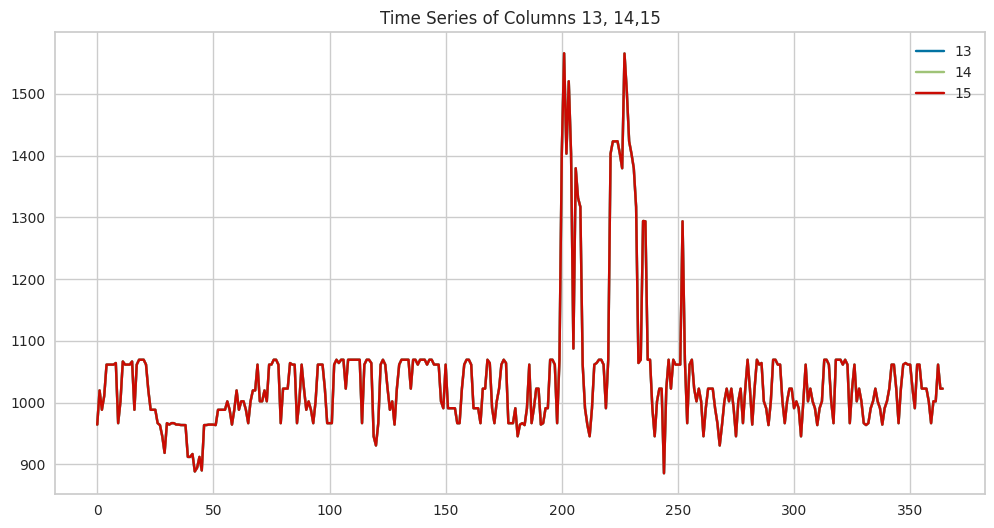

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df['13'], label='13')
plt.plot(df['14'], label='14')
plt.plot(df['15'], label='15')
plt.legend()
plt.title('Time Series of Columns 13, 14,15')
plt.show()

In [79]:
kf = simdkalman.KalmanFilter(
    state_transition = [[1,1],[0,1]],       
    process_noise = np.diag([0.1, 0.01]), 
    observation_model = np.array([[1,0]]),   
    observation_noise = 1.0)  

In [80]:
x = np.zeros((3, 1)) 

P = np.eye(3)

F = np.eye(3)

H = np.eye(3)

Q = np.eye(3) * 0.01

R = np.eye(3) * 0.1

z = np.zeros((3, 1))

In [81]:
def predict(x, P, F, Q):
    x = np.dot(F, x)
    P = np.dot(F, np.dot(P, F.T)) + Q
    return x, P

def update(x, P, z, H, R):
    y = z - np.dot(H, x)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
    x = x + np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))
    return x, P

In [82]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [83]:
data = pd.read_csv("/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding='latin-1', delimiter=';')
data_np = np.loadtxt("/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding='latin-1', delimiter=';', skiprows=1, usecols=(13, 14, 15), dtype=float)

In [84]:
df = data.iloc[:, [13, 14, 15]]  
df.columns = ['13', '14', '15']
df.head()

,13,14,15
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


In [85]:
filtered_data = []

for measurement in data_np:
    z = measurement.reshape(3, 1)

    x, P = predict(x, P, F, Q)

    x, P = update(x, P, z, H, R)

    filtered_data.append(x.flatten())

filtered_data = np.array(filtered_data)

In [86]:
mse_kalman = mean_squared_error(data_np, filtered_data)
mae_kalman = mean_absolute_error(data_np, filtered_data)
rmse_kalman = np.sqrt(mse_kalman)
r2_kalman = r2_score(data_np, filtered_data)

print("MSE:", mse_kalman)
print("MAE:", mae_kalman)
print("RMSE:", rmse_kalman)
print("R2:",r2_kalman)

MSE: 2795.5361200992884
MAE: 32.44273348259217
RMSE: 52.87282969635055
R2: 0.746443729276966


In [87]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df['13'], order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(df['13'])

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(df['13'], order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
mse_kalman = mean_squared_error(df['13'], forecast2)
mae_kalman = mean_absolute_error(df['13'], forecast2)
rmse_kalman = np.sqrt(mse_kalman)
r2_kalman = r2_score(df['13'], forecast2)
print("MSE:", mse_kalman)
print("MAE:", mae_kalman)
print("RMSE:", rmse_kalman)
print("R2:",r2_kalman)

MSE: 3503.2100800036937
MAE: 35.17638560413615
RMSE: 59.18792174087289
R2: 0.6822644315184312
